# HW03: Embeddings

In [1]:
# Import Libraries
import os
import nltk
import csv
import string
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim import corpora
from gensim import models
from gensim import similarities

from sklearn.decomposition import PCA

## Simpsons Dataset

### Import training data

In [2]:
# Import data
simpsons_docs = []

# Open and read file
with open('./data/simpsons/X_train.csv', 'r') as read_obj:
    for row in csv.reader(read_obj):
        simpsons_docs.append(row)
        
# Glimpse at training docs
for i in range(0,5):
    print(simpsons_docs[i])

['lisa', 'i', 'll', 'do', 'the', 'dishes', 'when', 'i', 'pick', 'it', 'out', 'of', 'the', 'chore', 'hat', 'and', 'it', 's', 'not', 'a', 'practice', 'see', 'there', 'it', 'is', 'but', 'that', 'was', 'a', 'practice', 'the', 'system', 'works']
['don', 't', 'worry', 'i', 've', 'got', 'a', 'man', 'on', 'the', 'perimeter']
['snowball']
['oh', 'yeah', 'you', 'were', 'way', 'off']
['oh', 'it', 's', 'beautiful', 'oh', 'oh', 'let', 's', 'put', 'bart', 's', 'beautiful', 'drawing', 'up', 'on', 'the', 'fridge']


### Word2Vec Embeddings

In [3]:
# Define Word2Vec Embeddings
simpsons_w2v_model_125 = models.Word2Vec(simpsons_docs, size=125, window=10, min_count=1, workers=10)
simpsons_w2v_model_25 = models.Word2Vec(simpsons_docs, size=25, window=10, min_count=1, workers=10)
simpsons_w2v_model_5 = models.Word2Vec(simpsons_docs, size=5, window=10, min_count=1, workers=10)

# Train Word2Vec Embeddings
simpsons_w2v_model_125.train(simpsons_docs, total_examples=len(simpsons_docs), epochs=20)
simpsons_w2v_model_25.train(simpsons_docs, total_examples=len(simpsons_docs), epochs=20)
simpsons_w2v_model_5.train(simpsons_docs, total_examples=len(simpsons_docs), epochs=20)

(6634238, 9024880)

In [4]:
# Save W2V Embeddings
simpsons_w2v_model_125.save("./resources/embeddings/Simpsons_125_7.model")
simpsons_w2v_model_25.save("./resources/embeddings/Simpsons_25_7.model")
simpsons_w2v_model_5.save("./resources/embeddings/Simpsons_5_7.model")

In [5]:
len(simpsons_w2v_model_5.wv.vocab)

19803

### 2D Plots

In [6]:
def plot_similar_words(words, model, subplot_size = [2,2], xlim=[-5,5], ylim=[-5,5]):
    
    fig = plt.figure(figsize=(15, 12))
    fig.suptitle('Most similar words to:', fontsize=20)
    
    # Loop over the words
    for i, word in enumerate(words):
        
        # Retrieve similar words
        most_similar = model.wv.most_similar(word)

        similar_words = [word]
        for w in most_similar:
            similar_words.append(w[0])

        # Create PCA object with 2 components
        pca = PCA(n_components=2)

        # Extract embeddings from model
        vocab = list(model.wv.vocab)
        X = model.wv[vocab]

        # Fit PCA with all embeddings vocab
        pca.fit(X)

        # Transform similar words
        X_pca = pca.transform(model.wv[similar_words])

        # Plot
        df = pd.DataFrame(X_pca, index=similar_words, columns=['x', 'y'])
        
        
        plt.subplot(subplot_size[0], subplot_size[1], i+1)
        plt.title(str(word), fontsize=18)
        plt.grid(True)
        plt.xlim(xlim)
        plt.ylim(ylim)

        plt.scatter(df['x'], df['y'], s=100, c='b', alpha=0.25)
        plt.scatter(df['x'][0], df['y'][0], s=100, c='r', alpha=0.25)
        for word, pos in df.iterrows():
            plt.annotate(word, pos, fontsize=11)


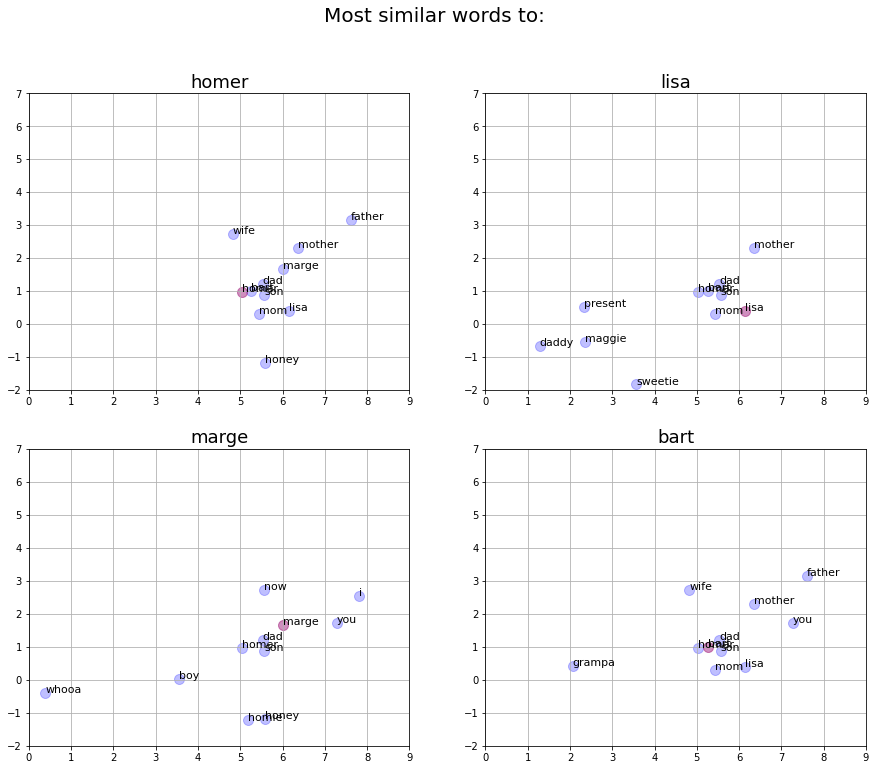

In [7]:
simpsons_characters = ['homer', 'lisa', 'marge', 'bart']
plot_similar_words(simpsons_characters, simpsons_w2v_model_25, subplot_size = [2,2], xlim=[0,9], ylim=[-2,7])

### Relations

## Friends Dataset

### Import Data

In [8]:
# Import data
friends_docs = []

# Open and read file
with open('./data/friends/X_train.csv', 'r') as read_obj:
    for row in csv.reader(read_obj):
        friends_docs.append(row)
        
# Glimpse at training docs
for i in range(0,5):
    print(friends_docs[i])

['okay', 'okay', 'i', 'll', 'tell', 'em', 'it', 'wasn', 't', 'chandler', 'who', 'got', 'high', 'now', 'who', 'should', 'i', 'say', 'it', 'was']
['no']
['oh', 'you', 'don', 't', 'want', 'me', 'on', 'the', 'trip']
['my', 'oh', 'my', 'god']
['nooo', 'but', 'it', 'but', 'it', 's', 'great']


### Word2Vec Embeddings

In [9]:
# Define Word2Vec Embeddings
friends_w2v_model_125 = models.Word2Vec(friends_docs, size=125, window=10, min_count=1, workers=10)
friends_w2v_model_25 = models.Word2Vec(friends_docs, size=25, window=10, min_count=1, workers=10)
friends_w2v_model_5 = models.Word2Vec(friends_docs, size=5, window=10, min_count=1, workers=10)

# Train Word2Vec Embeddings
friends_w2v_model_125.train(friends_docs, total_examples=len(friends_docs), epochs=20)
friends_w2v_model_25.train(friends_docs, total_examples=len(friends_docs), epochs=20)
friends_w2v_model_5.train(friends_docs, total_examples=len(friends_docs), epochs=20)

(5634205, 8170280)

In [10]:
# Save W2V Embeddings
friends_w2v_model_125.save("./resources/embeddings/Friends_125_7.model")
friends_w2v_model_25.save("./resources/embeddings/Friends_25_7.model")
friends_w2v_model_5.save("./resources/embeddings/Friends_5_7.model")

In [11]:
len(friends_w2v_model_5.wv.vocab)

11885

### 2D Plots

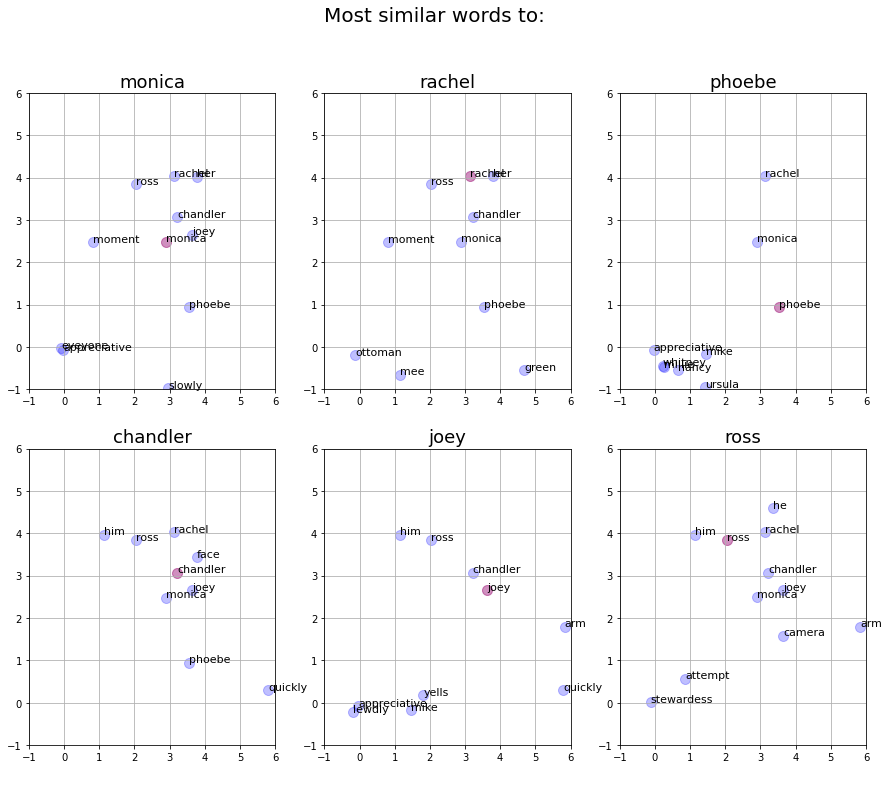

In [12]:
friends_characters = ['monica', 'rachel', 'phoebe', 'chandler', 'joey', 'ross']
plot_similar_words(friends_characters, friends_w2v_model_125, subplot_size = [2,3], xlim=[-1,6], ylim=[-1,6])